# Componentes de Software

A seguir são reunidos alguns conceitos importantes para se entender o princípio de **Componentes de Software**.

Em linhas gerais, um componente é um módulo de software reusável, que se liga aos seus parceiros exclusivamente através de interfaces. Apresentaremos aqui uma abordagem típica de ligação de componentes baseada em interfaces e conexões:
* **Interfaces** - expressam os serviços providos pelos componentes, declarados através de `interfaces` Java;
* **Conexões** - é a forma como componentes são ligados entre si; a partir delas um componente toma conhecimento do outro para que se comuniquem.

## Interfaces

Idealmente, todas as funcionalidades de um componente deveriam ser acessadas exclusivamente através de interfaces.

Vamos analisar o processo de definição do `DataSetComponent` como um componente de software. Considerando que o código a seguir é uma versão inicial do componente, uma representação visual para o mesmo pode ser feita em UML, conforme segue:

![Componente](images/console-dataset-a.png)

Veja a seguir a representação em Java:

~~~java
public interface IDataSetProperties {
  public String getDataSource();
  public void setDataSource(String dataSource);
}

public interface ITableProducer {
  String[] requestAttributes();
  String[][] requestInstances();
}
~~~

Note que cada interface que ele disponibiliza é apresentada na forma de uma haste com um círculo na ponta.

Como a interface `IDataSetProperties` tem métodos `get` e `set` para definir a propriedade `DataSource`, em vez de representar essa interface da forma tradicional, podemos representá-la na forma de uma propriedade associada ao componente como segue:

![Componente](images/console-dataset-b.png)

A representação de propriedades não é padrão UML, mas é usada por algumas extensões. Isso introduz um terceiro elemento usual em algumas implementações de componentes:

* **Propriedades** - podem ser usadas como mecanismos de configuração externa do componente; por exemplo, através da propriedade `dataSource` é possível externamente se configurar a fonte de dados do componente.

A partir de agora, criaremos uma interface específica para a modificação de propriedades e usaremos a representação na forma de propriedade.

Para englobar todas as interfaces em uma única, foi usada a estratégia de criar uma interface para o componente (`IDataSet`) unificando as demais na forma de herança:

~~~java
public interface IDataSet extends IDataSetProperties, ITableProducer {
}
~~~

Essa estratégia será adotada em todos os componentes.

## Conexões

Uma das formas mais comuns de comunicação entre componentes é a criação de uma conexão entre eles. Em linguagens orientadas a objetos uma estratégia consiste em um objeto (componente) guardar a referência de outro objeto (componente).

Utilizaremos um método padrão chamado `connect` que conecta dois componentes. Para isso um dos objetos recebe a referência de outro:
~~~java
public void connect(ITableProducer producer)
~~~

Esse método recebe a referência para qualquer objeto que implementa a interface `ITableProducer` e a guarda. A referência é posteriormente usada para a comunicação entre os dois objetos.

# Interface Requerida

O ideal é que tudo seja explícito e que haja uma interface para realizar essa conexão. Desse modo, criaremos uma interface chamada `ITableReceptacle`. Ela define o método para se estabelecer a conexão com objetos que têm a interface `ITableProducer`.

~~~java
public interface ITableReceptacle {
  public void connect(ITableProducer producer);
}
~~~

A interface requerida é representada visualmente por um meio círculo e indica o nome da interface que ela requer:

![Componente](images/console-dataset-d.svg)

Outra maneira bastante usual de representar os dois componentes conectados é ligando diretamente a interface provida com a requerida:

![Componente](images/console-dataset-e.svg)

Para tornar o componente `ConsoleComponent` completamente acessível por interfaces, acrescentamos outra interface para o seu método `update()`.

~~~java
public interface IConsoleUpdate {
  public void update();
}
~~~

O Diagrama completo fica:

![Componente](images/console-dataset-f.svg)

Como foi feito antes, usamos a interface `IConsole` para juntar as duas outras interfaces através da herança:

~~~java
public interface IConsole extends ITableReceptacle, IConsoleUpdate {
}
~~~

# Composição de Componentes

Vamos ilustrar agora como criar uma composição de componentes.

Conectamos um componente que acessa um arquivo CSV contendo zumbis doentes com as seguintes colunas:

* `name` - nome do zumbi
* `age` - idade do zumbi
* `diagnostic` - doença diagnosticada no zumbi
* `days_recovery` - número de dias que o zumbi levou para se recuperar da doença

## Importando uma Biblioteca

Neste laboratório vamos trabalhar na modalidade **caixa preta**. Por essa razão, os componentes serão importados de uma biblioteca e você não verá a sua implementação. 

Inicialmente, vamos importar a biblioteca onde estão implementados:

In [2]:
%classpath add jar ../lib/component-catalog-2020-08-04.jar

## Instanciando e Conectando Componentes

No código a seguir um componente de leitura de CSV (`DataSet`) e um componente `Console` são instanciados e conectados. O processo inicia quando o método `update()` é chamado no componente `Console`. O resultado é a apresentação do conteúdo do arquivo.

Note que ambos os componentes passam a ser tratados completamente a partir de suas interfaces.

In [3]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

IConsole console = new ConsoleComponent();
console.connect(dataset);

console.update();

=== Attributes ===
name, age, diagnostic, days_recovery

=== Instances ===
Rot Donnadd, 43, bacterial_infection, 9
Pid Mught, 38, bacterial_infection, 7
Thulk Lebbimp, 63, bite_deficit, 10
Bouvossam Damme, 71, bite_deficit, 13
Pirg Zall, 48, viral_infection, 4
Nullon Rackindock, 23, fights, 8
Shor Splitturch, 35, nothing, 0
Ger Ackeng, 66, bite_deficit, 11
Gleldo Shruck, 45, bacterial_infection, 8
Nadross Pilch, 60, viral_infection, 8
Sadrent Pemmir, 73, bite_deficit, 14
Read Rait, 55, bacterial_infection, 9
Dallun Whadder, 15, viral_infection, 2
Eapplar Thorg, 25, fights, 5
Blottork Patter, 68, bite_deficit, 12
Darrutt Bottall, 75, bite_deficit, 16
Gallir Shauch, 20, fights, 12
Dirpe Polnay, 39, bacterial_infection, 7
Harrimp Fottiem, 65, bite_deficit, 9


null

# Projection Component

Componente que realiza o recorte (projeção) de colunas em uma tabela.

![Projection Component](images/projection-component.png)

~~~java
public interface IProjectionProperties {
  String[] getAttributes();
  void setAttributes(String attribute[]);
}

public interface IProjection extends IProjectionProperties, ITableProducer, ITableReceptacle {
}
~~~

Recebe uma tabela de entrada (através da interface requerida `ITableProducer`) e gera uma tabela com as colunas recortadas (através da interface provida `ITableProducer`). A propriedade `attributes` contém um vetor com o nome das colunas a serem filtradas.

## Tarefa 1

Conecte o componente `DataSet` aos componentes de projeção e console para mostrar na tela as seguintes colunas: `name` e `age`.

Observe que neste campo de resposta já estão preenchidos os `imports` necessários para essa questão, basta você completar no mesmo campo com o código Java. A mesma estratégia é usada nas tarefas subsequentes.

In [4]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;
import pt.c08componentes.s20catalog.s30projection.*;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

IProjection projection = new ProjectionComponent();
String[] attributes = {"name", "age"};
projection.setAttributes(attributes);
projection.connect(dataset);

IConsole console = new ConsoleComponent();
console.connect(projection);

console.update();


=== Attributes ===
name, age

=== Instances ===
Rot Donnadd, 43
Pid Mught, 38
Thulk Lebbimp, 63
Bouvossam Damme, 71
Pirg Zall, 48
Nullon Rackindock, 23
Shor Splitturch, 35
Ger Ackeng, 66
Gleldo Shruck, 45
Nadross Pilch, 60
Sadrent Pemmir, 73
Read Rait, 55
Dallun Whadder, 15
Eapplar Thorg, 25
Blottork Patter, 68
Darrutt Bottall, 75
Gallir Shauch, 20
Dirpe Polnay, 39
Harrimp Fottiem, 65


null

# Selection Component

Componente que seleciona linhas da tabela que atendem a uma certa condição.

![Selection Component](images/selection-component.png)

~~~java
public interface ISelectionProperties {
  String getAttribute();
  void setAttribute(String attributeA);
  public String getOperator();
  public void setOperator(String operator);
  public String getValue();
  public void setValue(String value);
  boolean isNominalComparison();
  void setNominalComparison(boolean nominalComparison);
}
~~~

Os três propriedades `attribute`, `operator` e `value` definem a expressão de seleção. Por exemplo, a seguinte seleção `name = Rot Donnadd` seria:
* **attribute:** `name`
* **operator:** `=`
* **value:** ` Rot Donnadd`

A propriedade `nominalComparison` indica se a comparação será entre strings (`true`) ou números (`false`). O padrão é `true`.

A interface unificada do componente é:
~~~java
public interface ISelection extends ISelectionProperties, ITableProducer, ITableReceptacle {
}
~~~

## Tarefa 2

Conecte o componente `DataSet` aos componentes de seleção e console para mostrar na tela aquelas instâncias cujo diagnóstico seja `bacterial_infection`.

In [5]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;
import pt.c08componentes.s20catalog.s40selection.*;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

ISelection selection = new SelectionComponent();
selection.connect(dataset);
selection.setAttribute("diagnostic");
selection.setOperator("=");
selection.setValue("bacterial_infection");

IConsole console = new ConsoleComponent();
console.connect(selection);

console.update();

=== Attributes ===
name, age, diagnostic, days_recovery

=== Instances ===
Rot Donnadd, 43, bacterial_infection, 9
Pid Mught, 38, bacterial_infection, 7
Gleldo Shruck, 45, bacterial_infection, 8
Read Rait, 55, bacterial_infection, 9
Dirpe Polnay, 39, bacterial_infection, 7


null

## Tarefa 3

Conecte os componentes que você achar necessários para mostrar no console as colunas `name` e `age` de zumbis com `bacterial_infection`.

In [15]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;
import pt.c08componentes.s20catalog.s40selection.*;
import pt.c08componentes.s20catalog.s30projection.*;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

ISelection selection = new SelectionComponent();
selection.connect(dataset);
selection.setAttribute("diagnostic");
selection.setOperator("=");
selection.setValue("bacterial_infection");

IProjection projection = new ProjectionComponent();
String[] attributes = {"name", "age"};
projection.setAttributes(attributes);
projection.connect(selection);

IConsole console = new ConsoleComponent();
console.connect(projection);

console.update();

=== Attributes ===
name, age

=== Instances ===
Rot Donnadd, 43
Pid Mught, 38
Gleldo Shruck, 45
Read Rait, 55
Dirpe Polnay, 39


null

# Bubble Chart Component

Componente que plota um gráfico de dispersão de uma tabela recebida como entrada. Para isso a tabela deve ter recortadas apenas as duas colunas que serão apresentadas usando um componente de projeção.

![Bubble Chart Component](images/chartbubble-component.png)

As propriedades `Title`, `XTitle` e `YTitle` são os títulos do gráfico, do eixo X e Y respectivamente. Essas propriedades são acessadas a partir da interface `IChartProperties`:

~~~java
public interface IChartProperties {
  String getTitle();
  void setTitle(String title);
  String getXTitle();
  void setXTitle(String title);
  String getYTitle();
  void setYTitle(String title);
}
~~~

A interface `IRun` dispõe de métodos para ativar e desativar a plotagem do gráfico (métodos `start` e `stop` respectivamente):

~~~java
public interface IRun {
  public boolean start();
  public boolean stop();
}
~~~

A interface unificada é:

~~~java
public interface IChart extends ITableReceptacle, IRun, IChartProperties {
  /* Component Interfaces Set */
}
~~~

O comando a seguir importa uma biblioteca gráfica necessária para o componente:

In [7]:
%classpath add jar ../lib/xchart-3.5.2.jar

## Código do `ChartBubbleComponent`

Por questões de implementação no Jupyter, o código do componente BarChart precisou ficar dentro do Notebook. Entretanto, a ideia é que você use o componente apenas conhecendo as interfaces, sem precisar analisar o código. Então você pode pular o código a seguir.

In [8]:
import java.util.ArrayList;
import java.util.Hashtable;
import java.util.List;

import java.io.IOException;

import org.knowm.xchart.BubbleChart;
import org.knowm.xchart.BubbleChartBuilder;
import org.knowm.xchart.SwingWrapper;
import org.knowm.xchart.BitmapEncoder;
import org.knowm.xchart.BitmapEncoder.BitmapFormat;

import com.twosigma.beakerx.mimetype.MIMEContainer;
import java.io.File;
import java.nio.file.Files;

import pt.c08componentes.s20catalog.s00shared.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

public class ChartBubbleComponent implements IChart {
  private BubbleChart chart = null;

  private String title = "Chart";
  private String xTitle = "X",
                 yTitle = "Y";

  private ITableProducer producer = null;
 
  public void connect(ITableProducer producer) {
    this.producer = producer;
  }
  
  public ChartBubbleComponent() {
  }
  
  public String getTitle() {
    return title;
  }
  
  public void setTitle(String title) {
    this.title = title;
  }

  public String getXTitle() {
    return xTitle;
  }
  
  public void setXTitle(String title) {
    xTitle = title;
  }

  public String getYTitle() {
    return title;
  }
  
  public void setYTitle(String title) {
    yTitle = title;
  }

  public boolean start() {
    boolean status = true;
    
    chart = new BubbleChartBuilder().width(600).height(400).title(title).xAxisTitle(xTitle).yAxisTitle(yTitle).build();
    try{
        
        buildChart();         
        BitmapEncoder.saveBitmap(chart, "./chart", BitmapFormat.PNG);
        
        File file = new File("chart.png");
        byte[] data = Files.readAllBytes(file.toPath());
    
        MIMEContainer image = new MIMEContainer(MIMEContainer.MIME.IMAGE_PNG, data);
        display(image);
      }catch(IOException ex){
        status = false;
        System.out.println (ex.toString());      
      }
        
    return status;
  }
  
  public boolean stop() {
    return true;
  }
  
  public double[] toDouble(String[][] instances, int column ) {
    double[] numbers = new double[instances.length];
    for (int i = 0; i < instances.length; i++)
      numbers[i] = Double.parseDouble(instances[i][column]);
    return numbers;
  }

  private void buildChart() {
    if (chart != null && producer != null) {
      String[][] instances = producer.requestInstances();

      if (instances != null) {
        double[] xData = toDouble(instances, 0),
                 yData = toDouble(instances, 1);
        
        String[] categoryData = null;
        if (instances[0].length > 2) {
          categoryData = new String[instances.length];
          for (int c = 0; c < instances.length; c++)
            categoryData[c] = instances[c][2];
        }
        
        double[] bubbleData = null;
        if (instances[0].length > 3)
          bubbleData = toDouble(producer.requestInstances(), 3);
        else {
          bubbleData = new double[instances.length];
          for (int i = 0; i < xData.length; i++)
            bubbleData[i] = 10;
        }
          
        
        if (categoryData == null ||
            xData.length != yData.length || yData.length != bubbleData.length ||
            bubbleData.length != categoryData.length) {
          chart.addSeries(" ", xData, yData, bubbleData);
        } else {
          Hashtable<String,String> hash = new Hashtable<String,String>();
          int outer = 0;
          int size = categoryData.length;
          while (outer < size) {
            if (hash.containsKey(categoryData[outer]))
              outer++;
            else {
              hash.put(categoryData[outer],categoryData[outer]);
              List<Double> xSub = new ArrayList<Double>(),
                           ySub = new ArrayList<Double>(),
                           bubbleSub = new ArrayList<Double>();
              for (int inner = outer; inner < size; inner++)
                if (categoryData[inner].equalsIgnoreCase(categoryData[outer])) {
                  xSub.add(xData[inner]);
                  ySub.add(yData[inner]);
                  bubbleSub.add(bubbleData[inner]);
                }
              chart.addSeries(categoryData[outer], xSub, ySub, bubbleSub);
              outer++;
            }
          }
        }
      }
      
    }
    
  }
  
}

com.twosigma.beaker.javash.bkr612b2090.ChartBubbleComponent

## Tarefa 4

Conecte os componentes que você achar necessários para apresentar um gráfico comparativo entre idade e tempo de recuperação dos zumbis, conforme exemplo abaixo.

![Graph](images/example1.png)

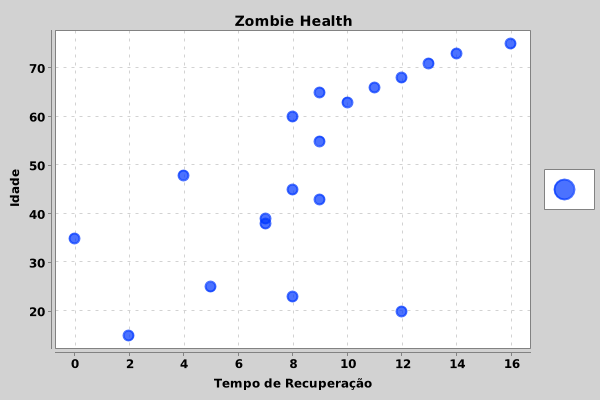

null

In [14]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s30projection.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

IProjection projection = new ProjectionComponent();
String[] attributes = {"days_recovery", "age"};
projection.setAttributes(attributes);
projection.connect(dataset);

IChart chart = new ChartBubbleComponent();
chart.setTitle("Zombie Health");
chart.setXTitle("Recovery Time");
chart.setYTitle("Age");
chart.connect(projection);

chart.start();
chart.stop();

## Tarefa 5

Conecte os componentes que você achar necessários para apresentar um gráfico comparativo entre idade e tempo de recuperação dos zumbis, colorindo os pontos por diagnóstico, conforme exemplo abaixo.

**Recomendação:** Se você recortar uma terceira coluna com o diagnóstico, o gráfico resultante irá colorir os pontos por diagnóstico.

![Graph](images/example2.png)

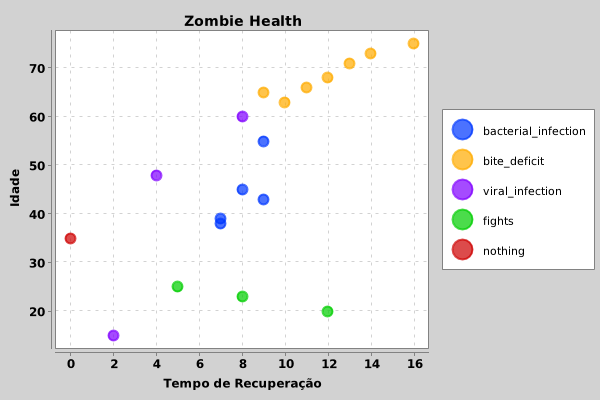

null

In [13]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s30projection.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

IProjection projection = new ProjectionComponent();
String[] attributes = {"days_recovery", "age", "diagnostic"};
projection.setAttributes(attributes);
projection.connect(dataset);

IChart chart = new ChartBubbleComponent();
chart.setTitle("Zombie Health");
chart.setXTitle("Recovery Time");
chart.setYTitle("Age");
chart.connect(projection);

chart.start();
chart.stop();

# Tarefa 6

Conecte os componentes que você achar necessários para apresentar um gráfico comparativo entre idade e tempo de recuperação, filtrando apenas a doença “bacterial_infection”.

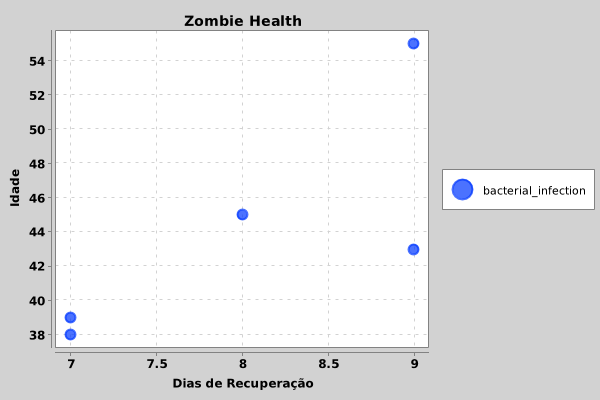

null

In [12]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s30projection.*;
import pt.c08componentes.s20catalog.s40selection.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../db/zombie-health-diseases.csv");

IProjection projection = new ProjectionComponent();
String[] attributes = {"days_recovery", "age", "diagnostic"};
projection.setAttributes(attributes);
projection.connect(dataset);

ISelection selection = new SelectionComponent();
selection.connect(projection);
selection.setAttribute("diagnostic");
selection.setOperator("=");
selection.setValue("bacterial_infection");

IChart chart = new ChartBubbleComponent();
chart.setTitle("Zombie Health");
chart.setXTitle("Recovery Time");
chart.setYTitle("Age");
chart.connect(selection);

chart.start();
chart.stop();